In [4]:
# 모듈 임포트
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 내가 만든고
from reg import Regression

# 다항 회귀(Polynomial Regression)

- Polynomial Regression과 과대적합/과소적합의 이해

## 다항 회귀(Polynomial Regression) 이해

**다중선형회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
- 독립변수(festure)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
- 직선으로 표현

**다항회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $

- 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식
- 선형회귀임

$ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $라고 하면

$ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $

**사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않음**
- 다항 회귀가 선형 회귀이므로 PolynomalFeatures 클래스를 통해 독립변수(피처)를 다항식 피처로 변환

PolynomialFeatures(degree=차수)

fit_transform(피처)

In [17]:
X = np.array([1,2,1,3]).reshape(2,2)
print(X)

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

[[1 2]
 [1 3]]


array([[1., 1., 2., 1., 2., 4.],
       [1., 1., 3., 1., 3., 9.]])

In [19]:
X = np.array([1,2,3,2,2,3,1,2,3]).reshape(3,3)
print(X)

poly3 = PolynomialFeatures(degree=3)
poly3.fit_transform(X)

[[1 2 3]
 [2 2 3]
 [1 2 3]]


array([[ 1.,  1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.,  1.,  2.,  3.,
         4.,  6.,  9.,  8., 12., 18., 27.],
       [ 1.,  2.,  2.,  3.,  4.,  4.,  6.,  4.,  6.,  9.,  8.,  8., 12.,
         8., 12., 18.,  8., 12., 18., 27.],
       [ 1.,  1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.,  1.,  2.,  3.,
         4.,  6.,  9.,  8., 12., 18., 27.]])

In [10]:
X = np.arange(12).reshape(4,3)
print(X)

poly3 = PolynomialFeatures(degree=3)
poly3.fit_transform(X)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 9.000e+00, 1.200e+01,
        1.500e+01, 1.600e+01, 2.000e+01, 2.500e+01, 2.700e+01, 3.600e+01,
        4.500e+01, 4.800e+01, 6.000e+01, 7.500e+01, 6.400e+01, 8.000e+01,
        1.000e+02, 1.250e+02],
       [1.000e+00, 6.000e+00, 7.000e+00, 8.000e+00, 3.600e+01, 4.200e+01,
        4.800e+01, 4.900e+01, 5.600e+01, 6.400e+01, 2.160e+02, 2.520e+02,
        2.880e+02, 2.940e+02, 3.360e+02, 3.840e+02, 3.430e+02, 3.920e+02,
        4.480e+02, 5.120e+02],
       [1.000e+00, 9.000e+00, 1.000e+01, 1.100e+01, 8.100e+01, 9.000e+01,
        9.900e+01, 1.000e+02, 1.100e+02, 1.210e+02, 7.290e+02, 8.100e+02,
        8.910e+02, 9.000e+02, 9.900e+02, 1.089e+03, 1.000e+03, 1.100e+03,
        1.210e+03, 

**3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성**

즉 회귀식은 결정값 $y = 1+ 2x_1 + 3x_1^2 + 4x_2^3$ 

**3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습**

In [30]:
from sklearn.linear_model import LinearRegression

# X = np.arange(0, 4).reshape(2,2)
X = np.array([2,3,4,2,9,1]).reshape(3,2)
print(X)
y = 1 + 2 * X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('다항 (polynomial) 회귀계수',np.round(model.coef_, 2))

[[2 3]
 [4 2]
 [9 1]]
3차 다항식 계수 [[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   2.  16.   8.   4.  64.  32.  16.   8.]
 [  1.   9.   1.  81.   9.   1. 729.  81.   9.   1.]]
다항 (polynomial) 회귀계수 [-0.   -0.12  0.07 -0.47 -0.15  0.37  0.42 -1.2   0.11  1.43]


### 파이프라인(Pipeline)을 이용한 3차 다항회귀 학습  

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

**`sklearn.pipeline의 Pipeline 클래스`**

- 연속된 변환을 순서대로 처리할 수 있도록 도와주는 클래스

- 형식 : 연속된 단계를 나타내는 (name, transforms) 튜플 목록을 입력받음
    - 마지막 단계에서는 transforms와 estimator를 모두 사용할 수 있고, 그외는 transforms여야 함
    - transforms는 fit_transform() 메서드를 가지고 있어야 함
    - estrimator는 fit(), predict() 메서드를 가지고 있어야 함
    
- 파이프라인의 fit() 메서드 호출:
    - 모든 transforms의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달
    - 마지막 단계에서는 fit()메서드만 호출

- 파이프라인 객체는 마지막 estimator와 동일한 메서드를 제공

In [34]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])

pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [37]:
np.round(pipe.named_steps['linear'].coef_, 2)

array([-0.  , -0.12,  0.07, -0.47, -0.15,  0.37,  0.42, -1.2 ,  0.11,
        1.43])

### 가상 데이터 생성 및 다항 회귀 추정

**가상 데이터 생성**

In [52]:
# 2차 다항식 : 0.5*X^2 + 2*X +2

n = 100
X = np.random.rand(n, 1)*6 - 3 # 0~1 사이 값을 n행 1열
y = 0.5*X**2 + 2*X + 2 + np.random.randn(n, 1) # randn 평균 0, 분산 1 인 normal 데이터

In [53]:
X.shape, y.shape

((100, 1), (100, 1))

**scatterplot**

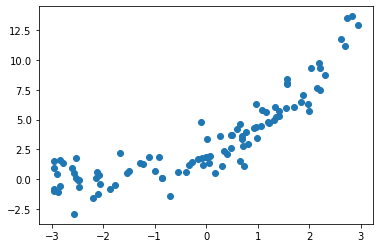

In [54]:
plt.scatter(X, y)

- 비선형적으로 분포
- 사이킷런의 PolynomialFeatures를 사용

**다항식으로 변환**

In [57]:
pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), ('linear', LinearRegression())])

pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

**선형회귀 LinearRegression 적용하여 회귀계수 추정**

In [58]:
np.round(pipe.named_steps['linear'].coef_, 2)

array([[2.07, 0.54]])

In [59]:
np.round(pipe.named_steps['linear'].intercept_, 2)

array([1.87])

**다항회귀식 시각화**

TypeError: 'NoneType' object is not callable

AttributeError: 'numpy.ndarray' object has no attribute '_final_estimator'

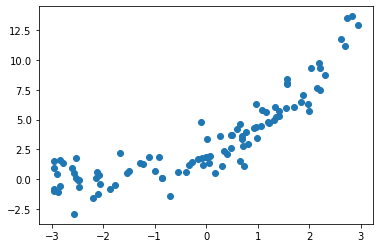

In [64]:
plt.scatter(X, y)
plt.plot(X, Pipeline.predict(X[:, np.newaxis]), label='Model')

### 다항회귀를 이용한 보스톤 집값 예측